### Reference generation with multiple tissue data - tabula Sapiens (subsample)


In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from cellama import (
    lm_cell_reference_celltyping,
    lm_cell_embed,
    lm_cell_integrated_embed
)

In [2]:
adata_ts = sc.read_h5ad('./Tabula_Sapiens_Subsample/Tabula_sapiens_10subsample_raw_counts.h5ad')

In [3]:
adata_ts

AnnData object with n_obs × n_vars = 48315 × 58559
    obs: 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender'
    var: 'gene_ids', 'feature_name', 'feature_type'

In [4]:
cell_type_key = 'cell_ontology_class'
batch_key = 'donor'
organ_key = 'organ_tissue'

### Dataset Overview

In [5]:
adata_ts.layers["counts"] = adata_ts.X.copy()
sc.pp.normalize_total(adata_ts)
# Logarithmize the data
sc.pp.log1p(adata_ts)
sc.pp.highly_variable_genes(adata_ts, n_top_genes=1500)

/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


In [6]:
sc.tl.pca(adata_ts)
sc.pp.neighbors(adata_ts)
sc.tl.umap(adata_ts)


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map)

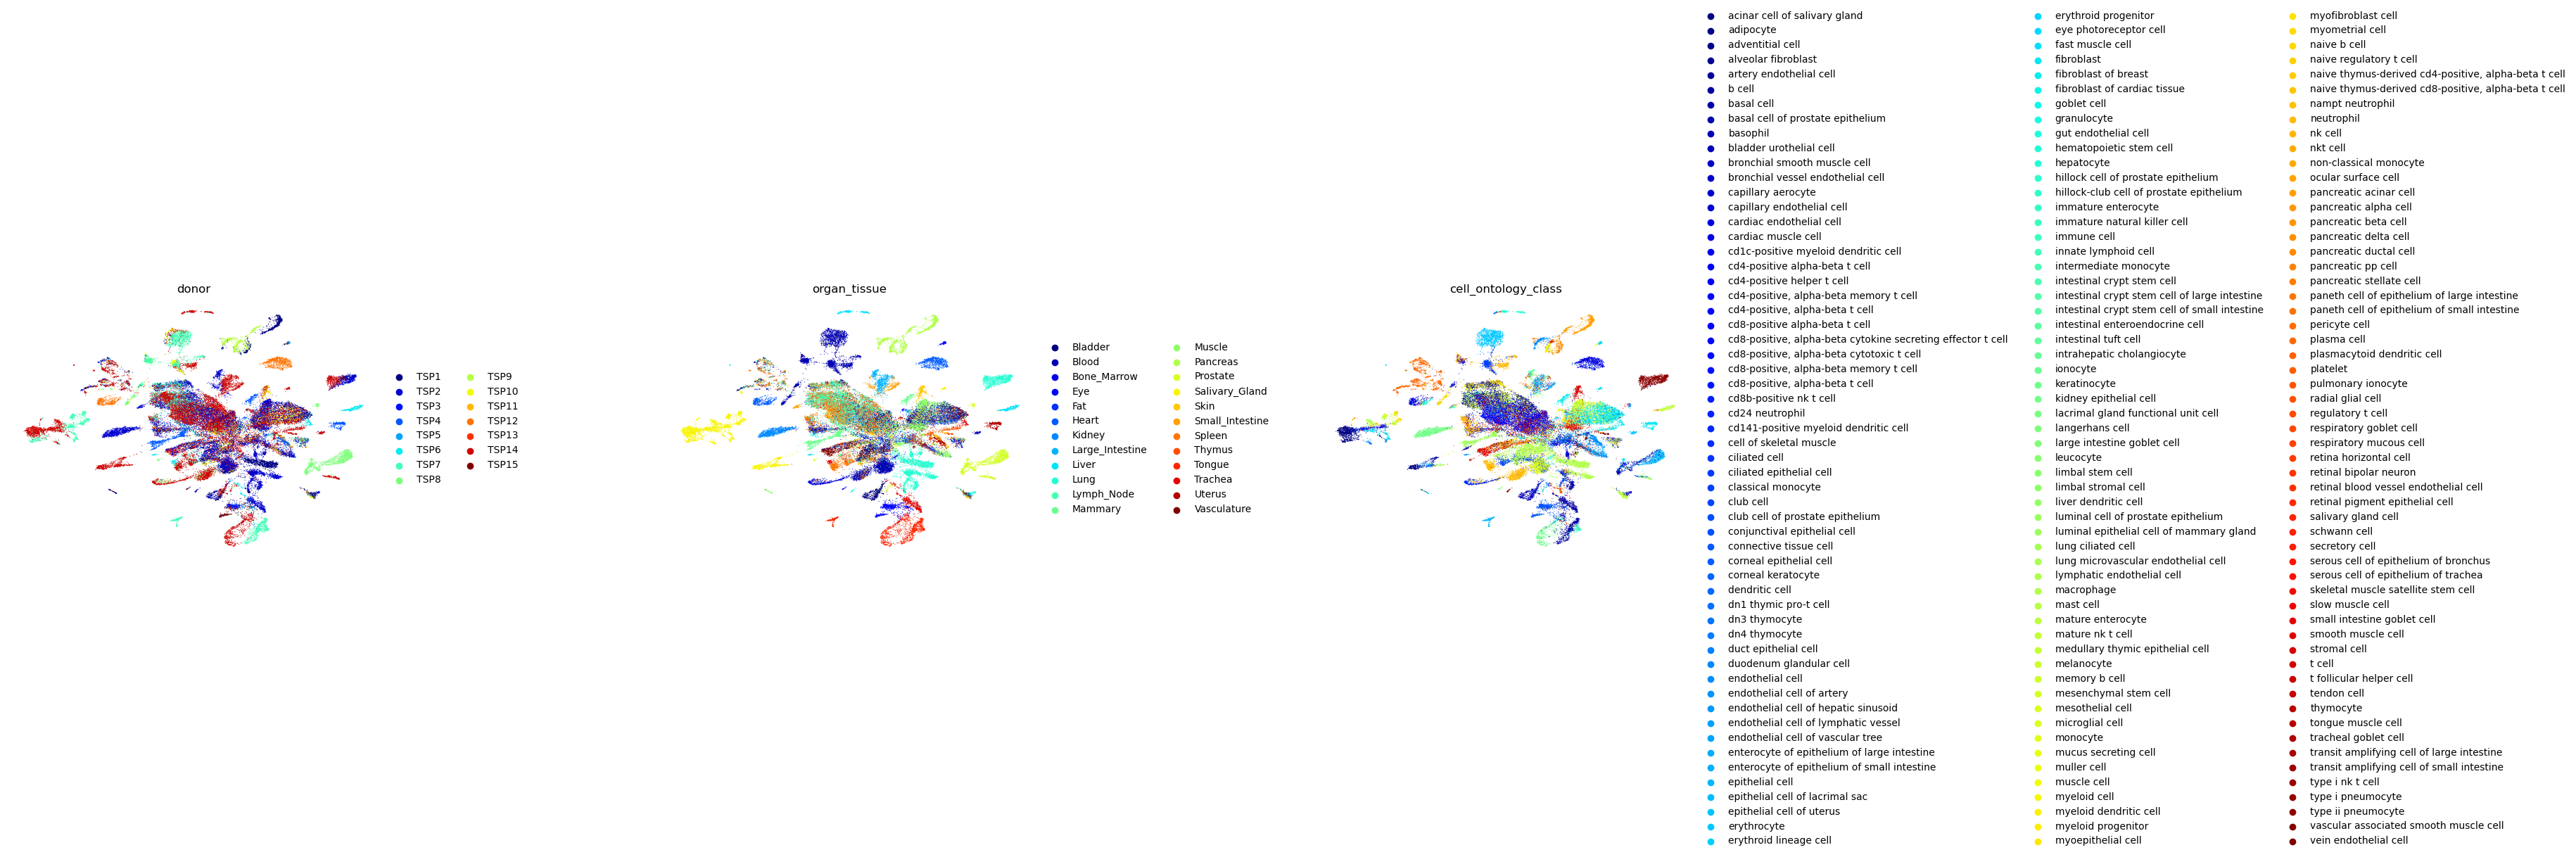

In [8]:

sc.pl.umap(adata_ts, 
           color=[batch_key,organ_key, cell_type_key], 
           frameon=False, 
           wspace=0.6, 
           palette = 'jet',
           title=[batch_key, organ_key,cell_type_key])

/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/anndata/_core/anndata.py:1118: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:

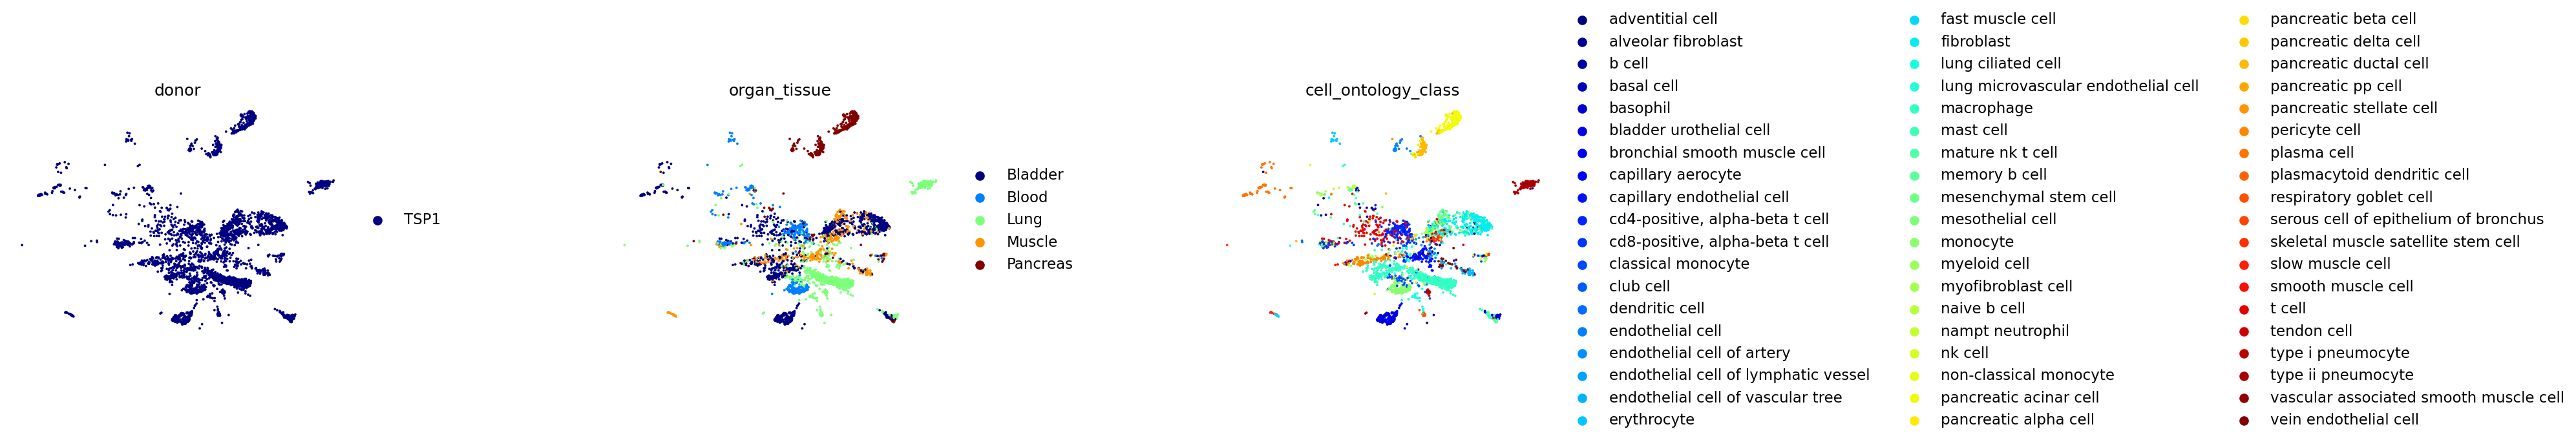

In [74]:
sc.pl.umap(adata_ts[adata_ts.obs[batch_key]=='TSP1'], 
           color=[batch_key,organ_key, cell_type_key], 
           frameon=False, 
           wspace=0.6, 
           palette = 'jet',
           title=[batch_key, organ_key,cell_type_key])

### Use Reference and Test Set
Donor 1 (TSP1) serves as the test set, while data from other donors are used as reference scRNA-seq data

In [9]:
#Redefine adata to  raw counts
adata_ts.X = adata_ts.layers['counts']

In [10]:
#index to gene name --> for using cellama
adata_ts.var.index = adata_ts.var['feature_name']

In [11]:
#Divide datasets to reference and test sets
adata_test = adata_ts[adata_ts.obs[batch_key]=='TSP1']
adata_ref = adata_ts[adata_ts.obs[batch_key]!='TSP1']

In [12]:
#Extract HVGs
sc.pp.normalize_total(adata_ref)
# Logarithmize the data
sc.pp.log1p(adata_ref)
sc.pp.highly_variable_genes(adata_ref, n_top_genes=1500)

/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:169: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


In [13]:
adata_ref = adata_ref[:,adata_ref.var.highly_variable]

In [14]:
adata_emb=  lm_cell_embed(adata_ref, top_k=30, model_name="all-MiniLM-L12-v2",
                          gene_list=None, obs_features=None,
                          return_sentence=True)

/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:95: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  adata_emb = sc.AnnData(emb_res)


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scanpy/plotting/_tools/scatterplots.py:1234: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map)

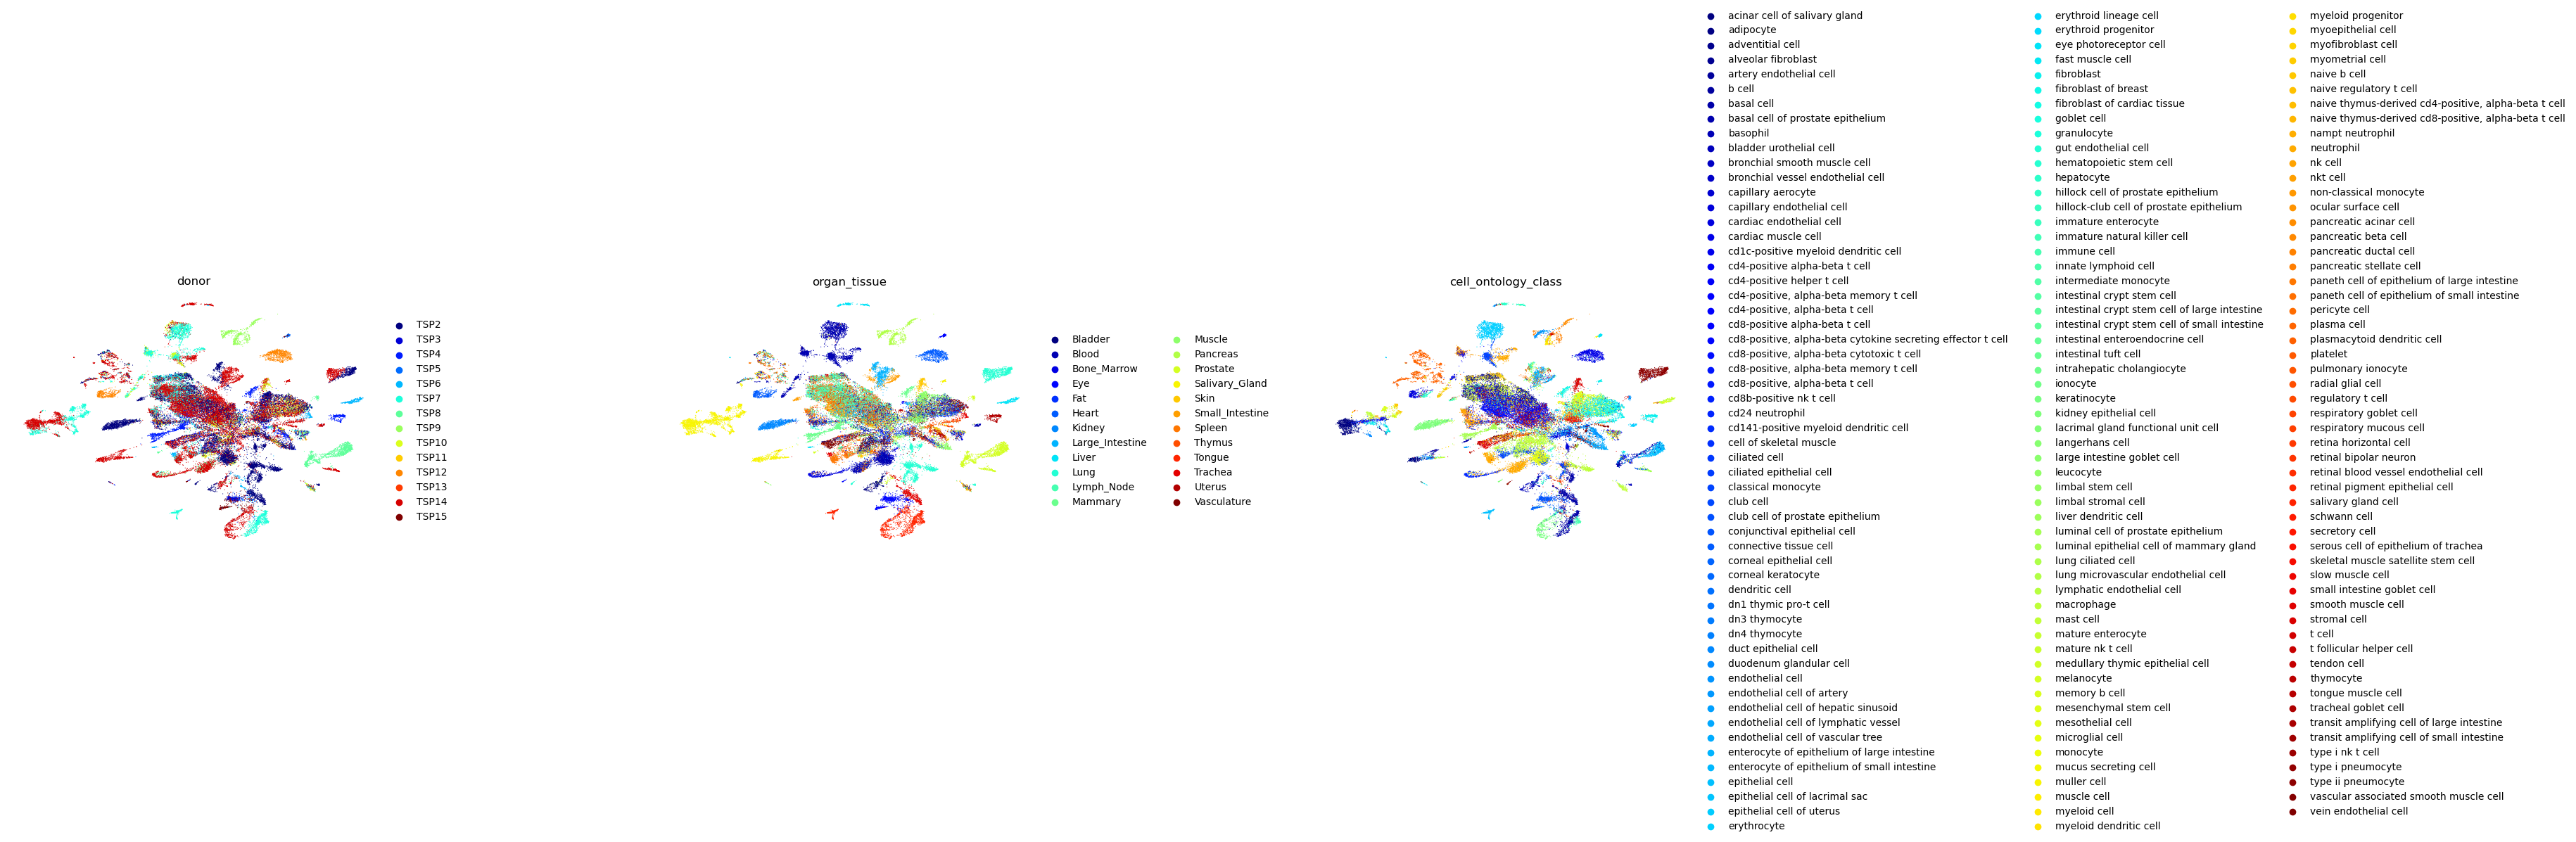

In [15]:
sc.pl.umap(adata_ref, 
           color=[batch_key,organ_key, cell_type_key], 
           frameon=False, 
           wspace=0.6, 
           palette = 'jet',
           title=[batch_key, organ_key])

In [16]:
#Select genes with hvg only for integration & cell typing
gene_list = adata_ref.var.index[adata_ref.var.highly_variable]

In [22]:
#Use 'organ_tissue' for integration 
adata_test_label = lm_cell_reference_celltyping(adata_ref, adata_test, 
                                                top_k=20, use_intersect= False,
                                                gene_list=gene_list,
                                                model_name='all-MiniLM-L12-v2',
                                                ref_cell = cell_type_key, 
                                                new_name='cell_type_LM',obs_features = [organ_key])


Language Model Cell Embedding Is Implemented


/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feature_value = str(adata.obs[feature][cell_id])
/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nearest_cell_types = [cell_types[i[0]] for i in indices]


In [23]:
#kNN-based
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
res_dict = {
    "accuracy": accuracy_score(adata_test_label.obs['cell_ontology_class'], adata_test_label.obs['cell_type_LM']),
    "precision": precision_score(adata_test_label.obs['cell_ontology_class'], adata_test_label.obs['cell_type_LM'], average="macro"),
    "recall": recall_score(adata_test_label.obs['cell_ontology_class'], adata_test_label.obs['cell_type_LM'], average="macro"),
    "macro_f1": f1_score(adata_test_label.obs['cell_ontology_class'], adata_test_label.obs['cell_type_LM'], average="macro"),
}

print(res_dict)

/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.7746478873239436, 'precision': 0.3512574802824833, 'recall': 0.34514269118491964, 'macro_f1': 0.31328275716146975}


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


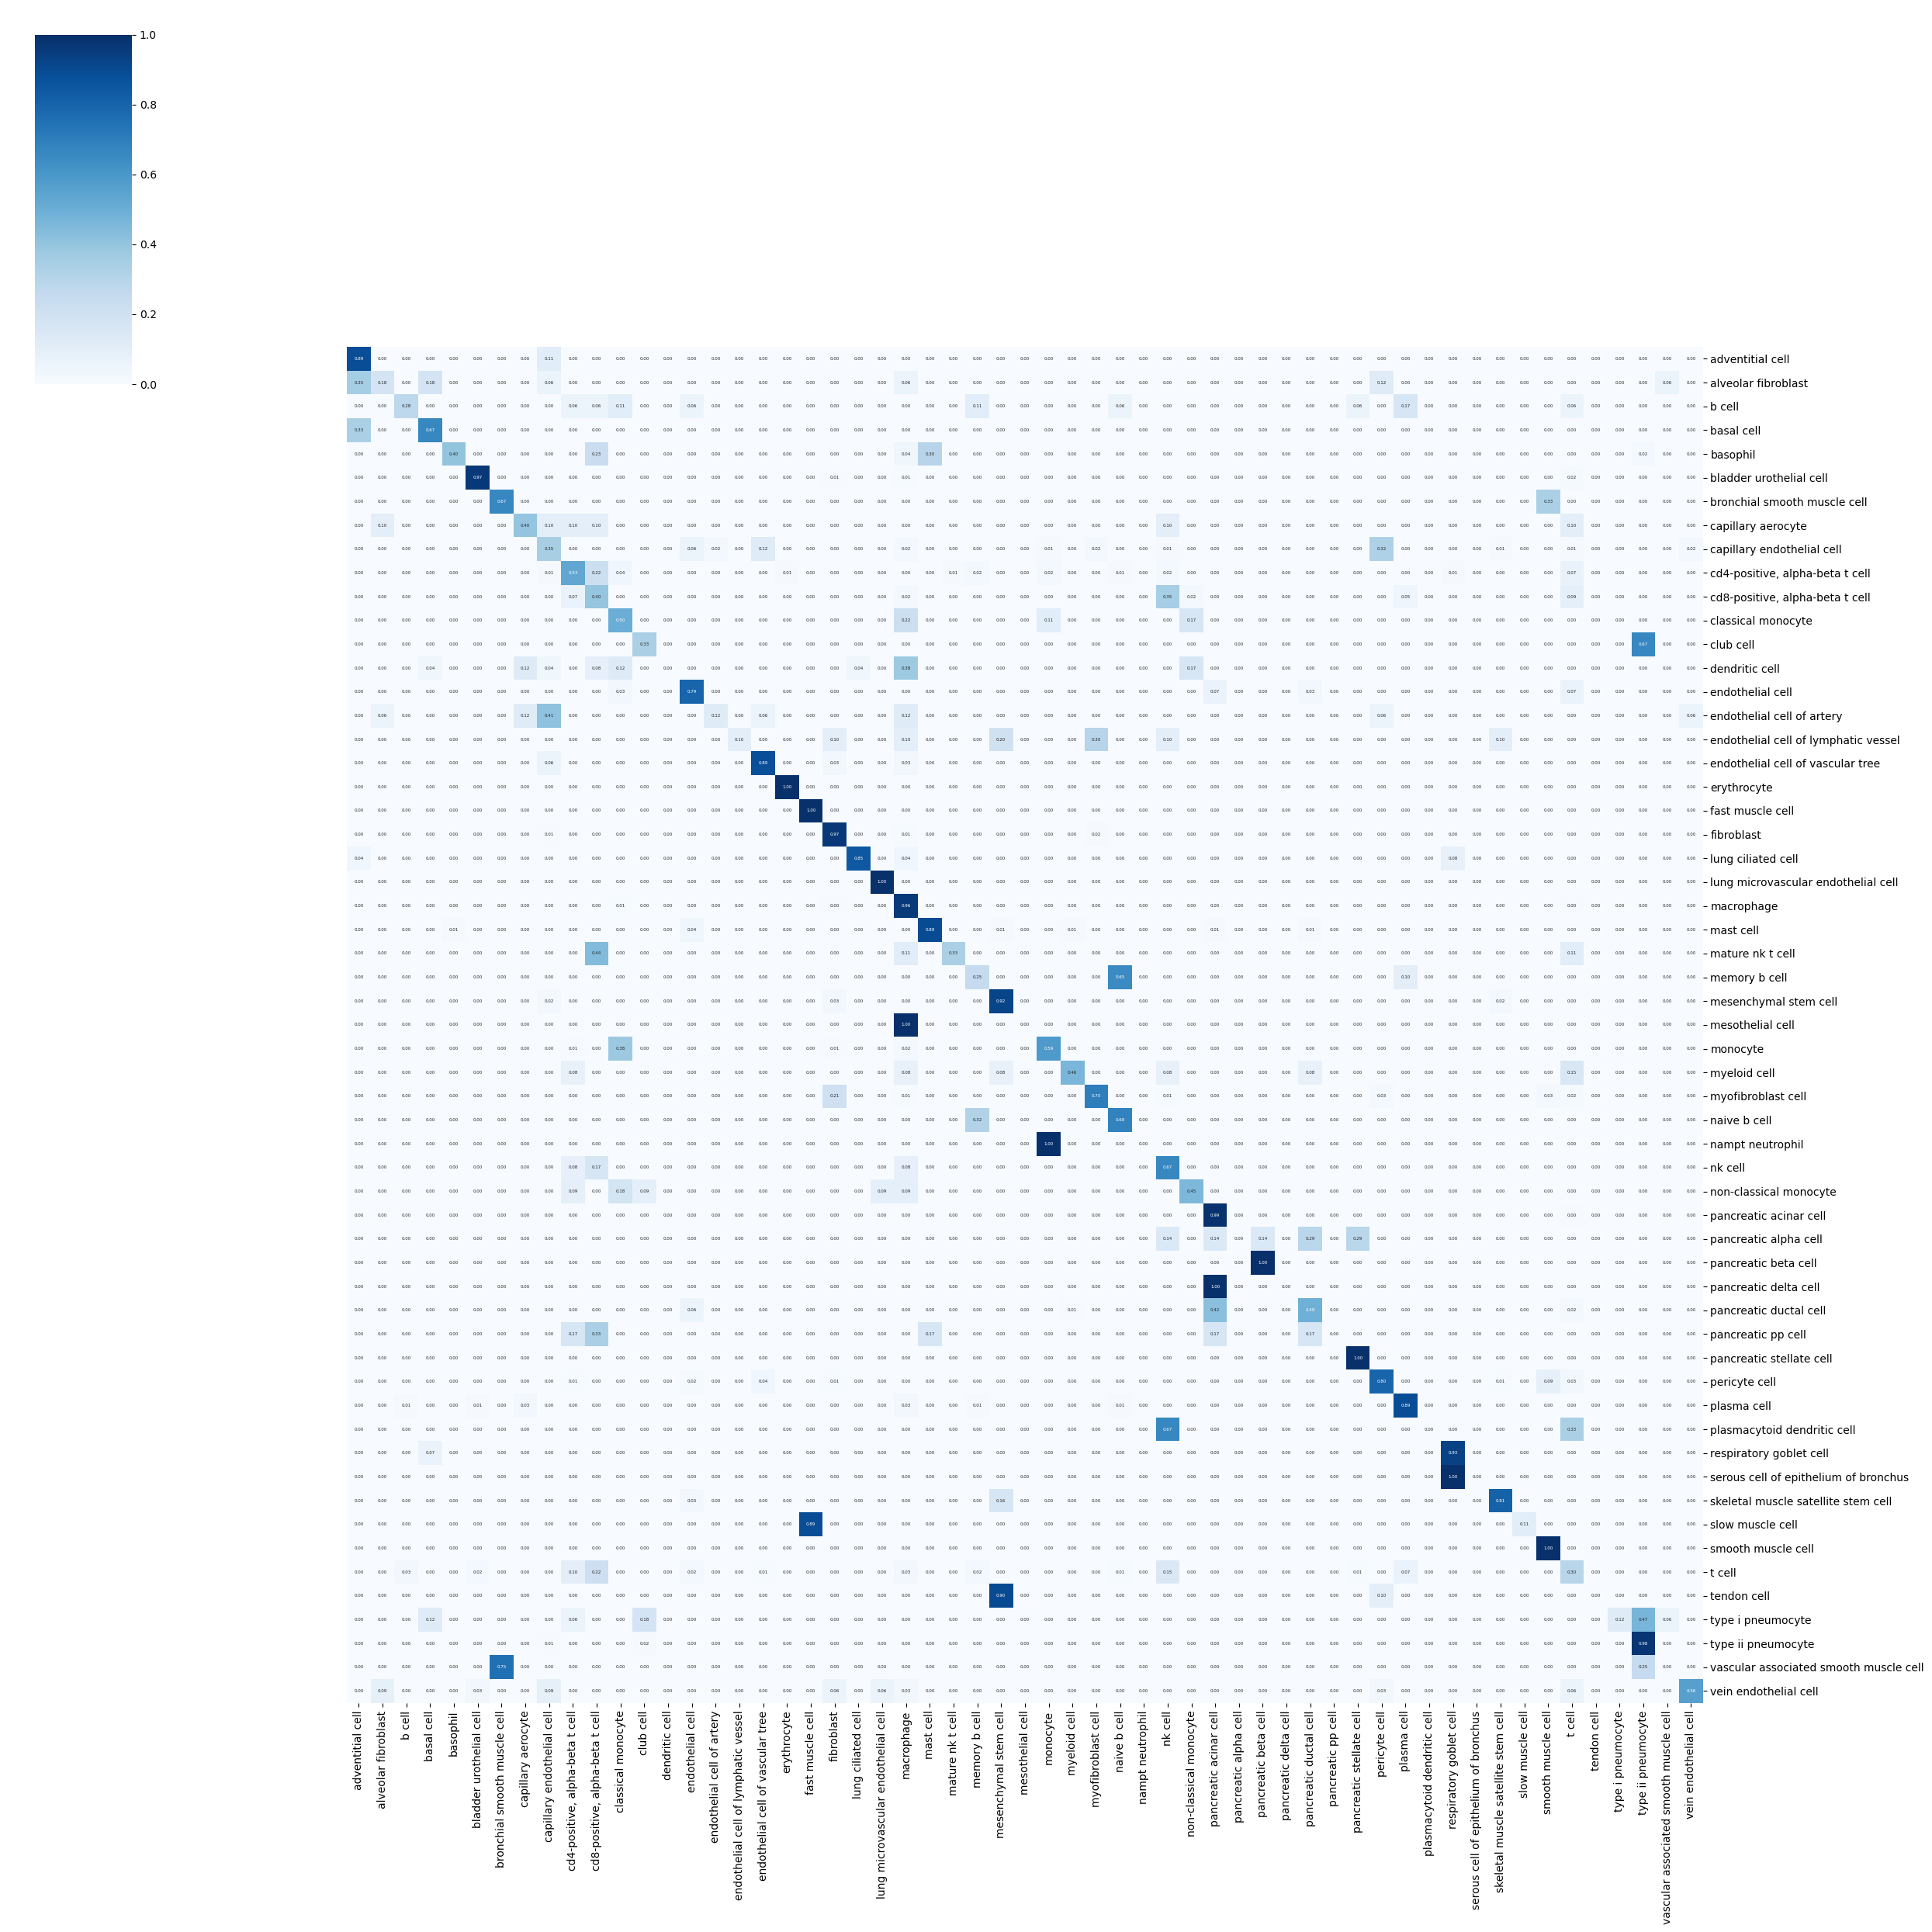

In [24]:
from sklearn.metrics import confusion_matrix

y_true = adata_test_label.obs['cell_ontology_class']
y_pred = adata_test_label.obs['cell_type_LM']
cell_type_list = np.unique(y_true)
matrix = confusion_matrix(y_true, y_pred, labels=cell_type_list)
matrix = matrix.astype("float") / matrix.sum(axis=1)[:, np.newaxis]

df = pd.DataFrame(matrix, index=cell_type_list[:matrix.shape[0]], columns=cell_type_list[:matrix.shape[1]])
ax = sns.clustermap(df,  
                    cmap='Blues',
                    annot=True ,fmt=".2f", 
                    annot_kws={'size': 4}, 
                    vmin=0, 
                    vmax=1,
                    row_cluster=False, 
                    col_cluster=False, 
                    figsize=(25, 25))

### scGPT application

In [118]:
import gdown, os
print("Downloading model ckpt...")
model_dir = "./scGPT_human"
if not os.path.exists(model_dir):
    !mkdir -p $model_dir
    gdown.download_folder(
        "https://drive.google.com/drive/folders/1oWh_-ZRdhtoGQ2Fw24HP41FgLoomVo-y",
        output=model_dir,
    )

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
Retrieving folder contents


Processing file 1hh2zGKyWAx3DyovD30GStZ3QlzmSqdk1 args.json
Processing file 14AebJfGOUF047Eg40hk57HCtrb0fyDTm best_model.pt
Processing file 1H3E_MJ-Dl36AQV6jLbna2EdvgPaqvqcC vocab.json


Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1hh2zGKyWAx3DyovD30GStZ3QlzmSqdk1
To: /home/user/DATA1/Data/Xenium_lungcancer_10xdata/scGPT_human/args.json
100%|██████████████████████████████████████████████████████████████████████████████| 1.30k/1.30k [00:00<00:00, 1.91MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=14AebJfGOUF047Eg40hk57HCtrb0fyDTm
From (redirected): https://drive.google.com/uc?id=14AebJfGOUF047Eg40hk57HCtrb0fyDTm&confirm=t&uuid=35239b22-e8e5-4316-bd2d-e65abc961595
To: /home/user/DATA1/Data/Xenium_lungcancer_10xdata/scGPT_human/best_model.pt
100%|████████████████████████████████████████████████████████████████████████████████| 205M/205M [00:31<00:00, 6.61MB/s]
Downloading...
From: https://drive.google.com/uc?id=1H3E_MJ-Dl36AQV6jLbna2EdvgPaqvqcC
To: /home/user/DATA1/Data/Xenium_lungcancer_10xdata/scGPT_human/vocab.json
100%|████████████████

In [25]:
import scgpt as scg
from pathlib import Path

/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scgpt/model/model.py:21: UserWarning: flash_attn is not installed
  warnings.warn("flash_attn is not installed")
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scgpt/model/multiomic_model.py:19: UserWarning: flash_attn is not installed
  warnings.warn("flash_attn is not installed")


In [26]:
try:
    import faiss
    faiss_imported = True
except ImportError:
    faiss_imported = False

print(faiss_imported)

True


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/faiss/loader.py:28: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(numpy.__version__) >= "1.19":
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/setuptools/_distutils/version.py:345: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [27]:
model_dir = Path("./scGPT_human")
cell_type_key = "cell_ontology_class"
gene_col = "feature_name"

In [28]:
ref_embed_adata = scg.tasks.embed_data(
    adata_ref,
    model_dir,
    gene_col=gene_col,
    batch_size=64,
)

scGPT - INFO - match 1500/1500 genes in vocabulary of size 60697.


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/anndata/_core/anndata.py:1118: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scgpt/model/model.py:77: UserWarning: flash-attn is not installed, using pytorch transformer instead. Set use_fast_transformer=False to avoid this warning. Installing flash-attn is highly recommended.
  warnings.warn(
Embedding cells:   0%|                                                                          | 0/694 [00:00<?, ?it/s]/home/user/anaconda3/envs/lang/lib/python3.9/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
huggingface/tokenizers: The current process just got forked, after

In [37]:
test_embed_adata = scg.tasks.embed_data(
    adata_test[:,gene_list], #Use only HVG 
    model_dir,
    gene_col=gene_col,
    batch_size=64,
)

scGPT - INFO - match 1500/1500 genes in vocabulary of size 60697.


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/anndata/_core/anndata.py:1118: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scgpt/tasks/cell_emb.py:212: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var["id_in_vocab"] = [
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/scgpt/model/model.py:77: UserWarning: flash-attn is not installed, using pytorch transformer instead. Set use_fast_transformer=False to avoid this warning. Installing flash-attn is highly recommended.
  warnings.warn(
Embedding cells:   0%|                                                                           | 0/62 [00:00<?, ?it/s]/home/user/anaconda3/envs/lang/lib/python3.9/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork(

In [38]:
# concatenate the two datasets
adata_concat = test_embed_adata.concatenate(ref_embed_adata, batch_key="dataset")
# mark the reference vs. query dataset
adata_concat.obs["is_ref"] = ["Query"] * len(test_embed_adata) + ["Reference"] * len(
    ref_embed_adata
)
adata_concat.obs["is_ref"] = adata_concat.obs["is_ref"].astype("category")
# mask the query dataset cell types
adata_concat.obs[cell_type_key] = adata_concat.obs[cell_type_key].astype("category")
adata_concat.obs[cell_type_key] = adata_concat.obs[cell_type_key].cat.add_categories(["To be predicted"])
adata_concat.obs[cell_type_key][: len(test_embed_adata)] = "To be predicted"

/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/anndata/_core/merge.py:847: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  concat_indices = concat_indices.str.cat(label_col.map(str), sep=index_unique)
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  [AnnData(sparse.csr_matrix(a.shape), obs=a.obs) for a in all_adatas],
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/anndata/_core/anndata.py:1785: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of annda

In [39]:
# Those functions are only used when faiss is not installed
def l2_sim(a, b):
    sims = -np.linalg.norm(a - b, axis=1)
    return sims

def get_similar_vectors(vector, ref, top_k=10):
    # sims = cos_sim(vector, ref)
    sims = l2_sim(vector, ref)
    
    top_k_idx = np.argsort(sims)[::-1][:top_k]
    return top_k_idx, sims[top_k_idx]

In [40]:
ref_cell_embeddings = ref_embed_adata.obsm["X_scGPT"]
test_emebd = test_embed_adata.obsm["X_scGPT"]

k = 10  # number of neighbors


index = faiss.IndexFlatL2(ref_cell_embeddings.shape[1])
index.add(ref_cell_embeddings)

# Query dataset, k - number of closest elements (returns 2 numpy arrays)
distances, labels = index.search(test_emebd, k)

idx_list=[i for i in range(test_emebd.shape[0])]
preds = []
sim_list = distances
for k in idx_list:
    if faiss_imported:
        idx = labels[k]
    else:
        idx, sim = get_similar_vectors(test_emebd[k][np.newaxis, ...], ref_cell_embeddings, k)
    pred = ref_embed_adata.obs[cell_type_key][idx].value_counts()
    preds.append(pred.index[0])
gt = adata_test.obs[cell_type_key].to_numpy()

/tmp/ipykernel_1190171/1733010458.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = ref_embed_adata.obs[cell_type_key][idx].value_counts()
/tmp/ipykernel_1190171/1733010458.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = ref_embed_adata.obs[cell_type_key][idx].value_counts()
/tmp/ipykernel_1190171/1733010458.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  pred = ref_embed_adata.obs[cell_type_key][idx].valu

In [41]:
res_dict = {
    "accuracy": accuracy_score(gt, preds),
    "precision": precision_score(gt, preds, average="macro"),
    "recall": recall_score(gt, preds, average="macro"),
    "macro_f1": f1_score(gt, preds, average="macro"),
}

res_dict

/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 0.6829705505761844,
 'precision': 0.2924996107130576,
 'recall': 0.2803754444967942,
 'macro_f1': 0.253795206897759}

### Grid Search for Optimizing cellama

In [48]:
### Grid Search
from tqdm import tqdm
from itertools import product

def grid_search(adata, test_adata):
    # Define the parameter grid
    param_grid = {
        'top_k': np.linspace(8, 40, 9, dtype=int), 
        'model_name': ['all-MiniLM-L12-v2'],
        'obs_features': [ None,[organ_key]]
    }

    # Create a product of all parameter combinations
    all_combinations = list(product(param_grid['top_k'], param_grid['model_name'], param_grid['obs_features']))
    results = []

    # Use tqdm to show progress
    for top_k, model_name, obs_features in tqdm(all_combinations, desc='Grid Search Progress', unit='combination'):
        try:
            # Run the cell typing function
            adata_test_label =lm_cell_reference_celltyping(
                                                adata, test_adata, 
                                                top_k=top_k, use_intersect= False,
                                                gene_list=gene_list,
                                                model_name=model_name,
                                                ref_cell = cell_type_key, 
                                                new_name='cell_type_LM',
                                                obs_features = obs_features
                                                )


            # Calculate metrics
            metrics = {
                "accuracy": accuracy_score(adata_test_label.obs[cell_type_key], adata_test_label.obs['cell_type_LM']),
                "precision": precision_score(adata_test_label.obs[cell_type_key], adata_test_label.obs['cell_type_LM'], average="macro"),
                "recall": recall_score(adata_test_label.obs[cell_type_key], adata_test_label.obs['cell_type_LM'], average="macro"),
                "macro_f1": f1_score(adata_test_label.obs[cell_type_key], adata_test_label.obs['cell_type_LM'], average="macro"),
            }
            
            # Store results
            results.append({
                'top_k': top_k,
                'model_name': model_name,
                'obs_features': ','.join(obs_features) if obs_features else 'None',
                'metrics': metrics
            })
            
            print('RESULTS',{
                'top_k': top_k,
                'model_name': model_name,
                'obs_features': ','.join(obs_features) if obs_features else 'None',
                'metrics': metrics
            })

        except Exception as e:
            print(f"Error with parameters top_k={top_k}, model_name={model_name}, obs_features={obs_features}: {str(e)}")

    return results

results = grid_search(adata_ref, adata_test)

Grid Search Progress:   0%|                                                             | 0/18 [00:00<?, ?combination/s]

Language Model Cell Embedding Is Implemented


/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nearest_cell_types = [cell_types[i[0]] for i in indices]
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progre

RESULTS {'top_k': 8, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'None', 'metrics': {'accuracy': 0.6017925736235595, 'precision': 0.2174853237192858, 'recall': 0.1962716872169161, 'macro_f1': 0.18612069120375144}}
Language Model Cell Embedding Is Implemented


/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feature_value = str(adata.obs[feature][cell_id])
/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nearest_cell_types = [cell_types[i[0]] for i in indices]
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

RESULTS {'top_k': 8, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'organ_tissue', 'metrics': {'accuracy': 0.7229193341869398, 'precision': 0.436778559847687, 'recall': 0.4625411777364757, 'macro_f1': 0.4012137707782048}}
Language Model Cell Embedding Is Implemented


/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/anndata/_core/anndata.py:1118: DeprecationWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, pd.CategoricalDtype) instead
  if not is_categorical_dtype(df_full[k]):
/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nearest_cell_types = [cell_types[i[0]] for i in indices]
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/sit

RESULTS {'top_k': 12, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'None', 'metrics': {'accuracy': 0.6189500640204866, 'precision': 0.24466083515392442, 'recall': 0.21496893784314636, 'macro_f1': 0.20618480055930205}}
Language Model Cell Embedding Is Implemented


/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feature_value = str(adata.obs[feature][cell_id])
/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nearest_cell_types = [cell_types[i[0]] for i in indices]
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

RESULTS {'top_k': 12, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'organ_tissue', 'metrics': {'accuracy': 0.7556978233034571, 'precision': 0.4462606007252358, 'recall': 0.4421409525722816, 'macro_f1': 0.40228422653019}}
Language Model Cell Embedding Is Implemented


/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nearest_cell_types = [cell_types[i[0]] for i in indices]
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progre

RESULTS {'top_k': 16, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'None', 'metrics': {'accuracy': 0.6796414852752881, 'precision': 0.22968978896295236, 'recall': 0.20782486348104837, 'macro_f1': 0.1976555529218909}}
Language Model Cell Embedding Is Implemented


/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feature_value = str(adata.obs[feature][cell_id])
/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nearest_cell_types = [cell_types[i[0]] for i in indices]
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

RESULTS {'top_k': 16, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'organ_tissue', 'metrics': {'accuracy': 0.7871959026888604, 'precision': 0.3892009856557142, 'recall': 0.41300263475747073, 'macro_f1': 0.3718496615132712}}
Language Model Cell Embedding Is Implemented


/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nearest_cell_types = [cell_types[i[0]] for i in indices]
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progre

RESULTS {'top_k': 20, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'None', 'metrics': {'accuracy': 0.6827144686299615, 'precision': 0.24911921609377266, 'recall': 0.22039600160000034, 'macro_f1': 0.20973835160145868}}
Language Model Cell Embedding Is Implemented


/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feature_value = str(adata.obs[feature][cell_id])
/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nearest_cell_types = [cell_types[i[0]] for i in indices]
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

RESULTS {'top_k': 20, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'organ_tissue', 'metrics': {'accuracy': 0.7746478873239436, 'precision': 0.3512574802824833, 'recall': 0.34514269118491964, 'macro_f1': 0.31328275716146975}}
Language Model Cell Embedding Is Implemented


/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nearest_cell_types = [cell_types[i[0]] for i in indices]
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progre

RESULTS {'top_k': 24, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'None', 'metrics': {'accuracy': 0.6850192061459667, 'precision': 0.2515554966835831, 'recall': 0.2306960575243032, 'macro_f1': 0.22289663881843627}}
Language Model Cell Embedding Is Implemented


/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feature_value = str(adata.obs[feature][cell_id])
/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nearest_cell_types = [cell_types[i[0]] for i in indices]
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

RESULTS {'top_k': 24, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'organ_tissue', 'metrics': {'accuracy': 0.7293213828425096, 'precision': 0.2900186175732716, 'recall': 0.28345735424398993, 'macro_f1': 0.26202314264236637}}
Language Model Cell Embedding Is Implemented


/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nearest_cell_types = [cell_types[i[0]] for i in indices]
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progre

RESULTS {'top_k': 28, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'None', 'metrics': {'accuracy': 0.6758002560819463, 'precision': 0.23426033330700818, 'recall': 0.2075778327133124, 'macro_f1': 0.2040215387189636}}
Language Model Cell Embedding Is Implemented


/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feature_value = str(adata.obs[feature][cell_id])
/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nearest_cell_types = [cell_types[i[0]] for i in indices]
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

RESULTS {'top_k': 28, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'organ_tissue', 'metrics': {'accuracy': 0.6558258642765685, 'precision': 0.20361765288828937, 'recall': 0.18724914876412457, 'macro_f1': 0.1781539771012174}}
Language Model Cell Embedding Is Implemented


/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nearest_cell_types = [cell_types[i[0]] for i in indices]
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progre

RESULTS {'top_k': 32, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'None', 'metrics': {'accuracy': 0.6804097311139564, 'precision': 0.2471165910256256, 'recall': 0.22639598970610592, 'macro_f1': 0.2149078362147412}}
Language Model Cell Embedding Is Implemented


/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feature_value = str(adata.obs[feature][cell_id])
/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nearest_cell_types = [cell_types[i[0]] for i in indices]
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

RESULTS {'top_k': 32, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'organ_tissue', 'metrics': {'accuracy': 0.6801536491677337, 'precision': 0.24688283405654185, 'recall': 0.2259546834395569, 'macro_f1': 0.21460550842987897}}
Language Model Cell Embedding Is Implemented


/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nearest_cell_types = [cell_types[i[0]] for i in indices]
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progre

RESULTS {'top_k': 36, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'None', 'metrics': {'accuracy': 0.6809218950064021, 'precision': 0.24791448721825277, 'recall': 0.22723707528656376, 'macro_f1': 0.21567476904943828}}
Language Model Cell Embedding Is Implemented


/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feature_value = str(adata.obs[feature][cell_id])
/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nearest_cell_types = [cell_types[i[0]] for i in indices]
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

RESULTS {'top_k': 36, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'organ_tissue', 'metrics': {'accuracy': 0.6809218950064021, 'precision': 0.24791448721825277, 'recall': 0.22723707528656376, 'macro_f1': 0.21567476904943828}}
Language Model Cell Embedding Is Implemented


/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nearest_cell_types = [cell_types[i[0]] for i in indices]
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
Grid Search Progre

RESULTS {'top_k': 40, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'None', 'metrics': {'accuracy': 0.6809218950064021, 'precision': 0.24791448721825277, 'recall': 0.22723707528656376, 'macro_f1': 0.21567476904943828}}
Language Model Cell Embedding Is Implemented


/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:62: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  feature_value = str(adata.obs[feature][cell_id])
/home/user/DATA1/Data/Xenium_lungcancer_10xdata/cellama.py:75: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  nearest_cell_types = [cell_types[i[0]] for i in indices]
/home/user/anaconda3/envs/lang/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_st

RESULTS {'top_k': 40, 'model_name': 'all-MiniLM-L12-v2', 'obs_features': 'organ_tissue', 'metrics': {'accuracy': 0.6809218950064021, 'precision': 0.24791448721825277, 'recall': 0.22723707528656376, 'macro_f1': 0.21567476904943828}}


In [49]:
df_results = pd.DataFrame(results)

df_results['accuracy'] = df_results['metrics'].apply(lambda x: x['accuracy'])
df_results['precision'] = df_results['metrics'].apply(lambda x: x['precision'])
df_results['recall'] = df_results['metrics'].apply(lambda x: x['recall'])
df_results['macro_f1'] = df_results['metrics'].apply(lambda x: x['macro_f1'])


In [50]:
df_results

top_k         model_name  obs_features  \
0       8  all-MiniLM-L12-v2          None   
1       8  all-MiniLM-L12-v2  organ_tissue   
2      12  all-MiniLM-L12-v2          None   
3      12  all-MiniLM-L12-v2  organ_tissue   
4      16  all-MiniLM-L12-v2          None   
5      16  all-MiniLM-L12-v2  organ_tissue   
6      20  all-MiniLM-L12-v2          None   
7      20  all-MiniLM-L12-v2  organ_tissue   
8      24  all-MiniLM-L12-v2          None   
9      24  all-MiniLM-L12-v2  organ_tissue   
10     28  all-MiniLM-L12-v2          None   
11     28  all-MiniLM-L12-v2  organ_tissue   
12     32  all-MiniLM-L12-v2          None   
13     32  all-MiniLM-L12-v2  organ_tissue   
14     36  all-MiniLM-L12-v2          None   
15     36  all-MiniLM-L12-v2  organ_tissue   
16     40  all-MiniLM-L12-v2          None   
17     40  all-MiniLM-L12-v2  organ_tissue   

                                              metrics  accuracy  precision  \
0   {'accuracy': 0.6017925736235595, 'precision': ...  0.601793   0.217485   
1   {'accuracy': 0.7229193341869398, 'precision': ...  0.722919   0.436779   
2   {'accuracy': 0.6189500640204866, 'precision': ...  0.618950   0.244661   
3   {'accuracy': 0.7556978233034571, 'precision': ...  0.755698   0.446261   
4   {'accuracy': 0.6796414852752881, 'precision': ...  0.679641   0.229690   
5   {'accuracy': 0.7871959026888604, 'precision': ...  0.787196   0.389201   
6   {'accuracy': 0.6827144686299615, 'precision': ...  0.682714   0.249119   
7   {'accuracy': 0.7746478873239436, 'precision': ...  0.774648   0.351257   
8   {'accuracy': 0.6850192061459667, 'precision': ...  0.685019   0.251555   
9   {'accuracy': 0.7293213828425096, 'precision': ...  0.729321   0.290019   
10  {'accuracy': 0.6758002560819463, 'precision': ...  0.675800   0.234260   
11  {'accuracy': 0.6558258642765685, 'precision': ...  0.655826   0.203618   
12  {'accuracy': 0.6804097311139564, 'precision': ...  0.680410   0.247117   
13  {'accuracy': 0.6801536491677337, 'precision': ...  0.680154   0.246883   
14  {'accuracy': 0.6809218950064021, 'precision': ...  0.680922   0.247914   
15  {'accuracy': 0.6809218950064021, 'precision': ...  0.680922   0.247914   
16  {'accuracy': 0.6809218950064021, 'precision': ...  0.680922   0.247914   
17  {'accuracy': 0.6809218950064021, 'precision': ...  0.680922   0.247914   

      recall  macro_f1  
0   0.196272  0.186121  
1   0.462541  0.401214  
2   0.214969  0.206185  
3   0.442141  0.402284  
4   0.207825  0.197656  
5   0.413003  0.371850  
6   0.220396  0.209738  
7   0.345143  0.313283  
8   0.230696  0.222897  
9   0.283457  0.262023  
10  0.207578  0.204022  
11  0.187249  0.178154  
12  0.226396  0.214908  
13  0.225955  0.214606  
14  0.227237  0.215675  
15  0.227237  0.215675  
16  0.227237  0.215675  
17  0.227237  0.215675

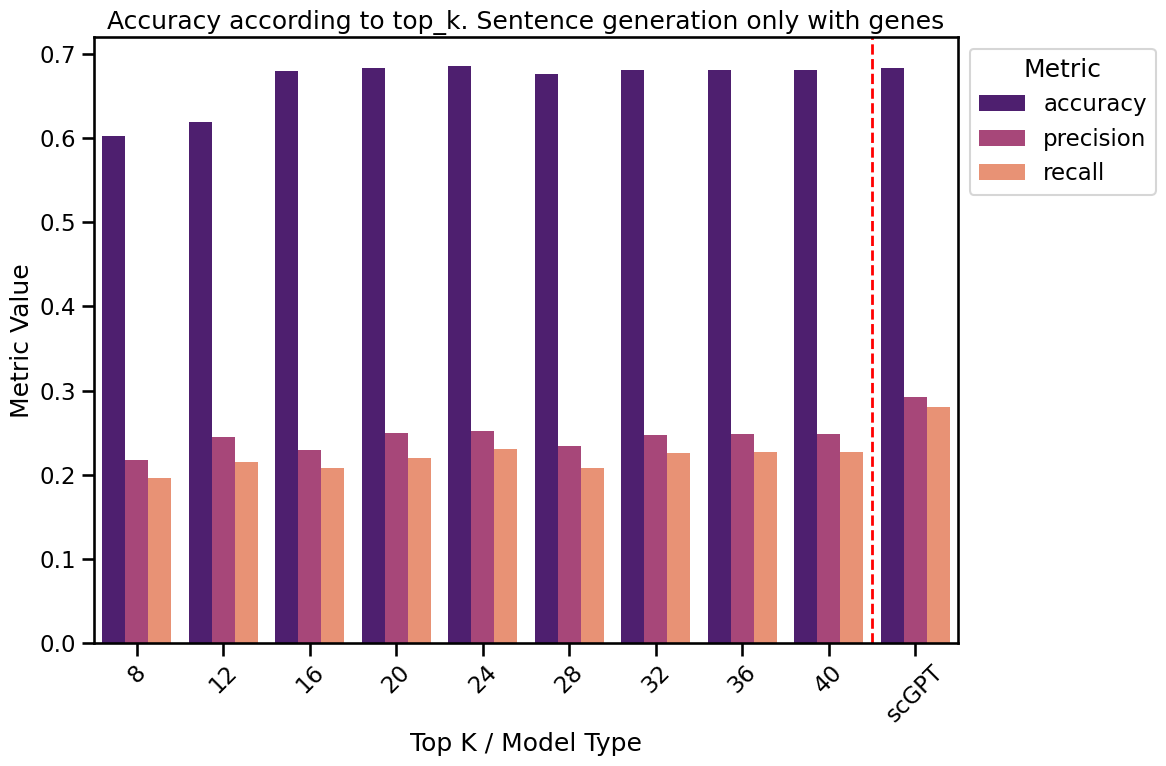

In [68]:
df_none = df_results[df_results['obs_features'] == 'None']

zeroshot_results = {
    "top_k": "scGPT",  # Unique identifier
    "model_name": "none",
    "obs_features": "None",
    'accuracy': 0.6829705505761844,
    'precision': 0.2924996107130576,
    'recall': 0.2803754444967942,
    'macro_f1': 0.253795206897759
}

# Convert the dictionary to a DataFrame
zeroshot_df = pd.DataFrame([zeroshot_results])

# Use concat to add the zeroshot results DataFrame to df_none
df_none = pd.concat([df_none, zeroshot_df], ignore_index=True)


# Melt the DataFrame to make it suitable for seaborn's barplot
df_melted = df_none.melt(id_vars=['top_k'], value_vars=['accuracy', 'precision', 'recall'],
                         var_name='Metric', value_name='Value')

# Create a barplot
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
barplot = sns.barplot(x='top_k', y='Value', hue='Metric', data=df_melted, palette="magma")

# Highlight the scGPT zeroshot results
# Find the index for scGPT results to draw a vertical line
scgpt_index = df_melted.index[df_melted['top_k'] == 'scGPT'].tolist()[0]
plt.axvline(x=scgpt_index - 0.5, color='red', linestyle='--', linewidth=2)  # Adjusting x position for aesthetics

plt.title('Accuracy according to top_k. Sentence generation only with genes')
plt.xlabel('Top K / Model Type')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.legend(title='Metric', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()  # Adjust layout to make room for legend and x-axis labels
plt.show()

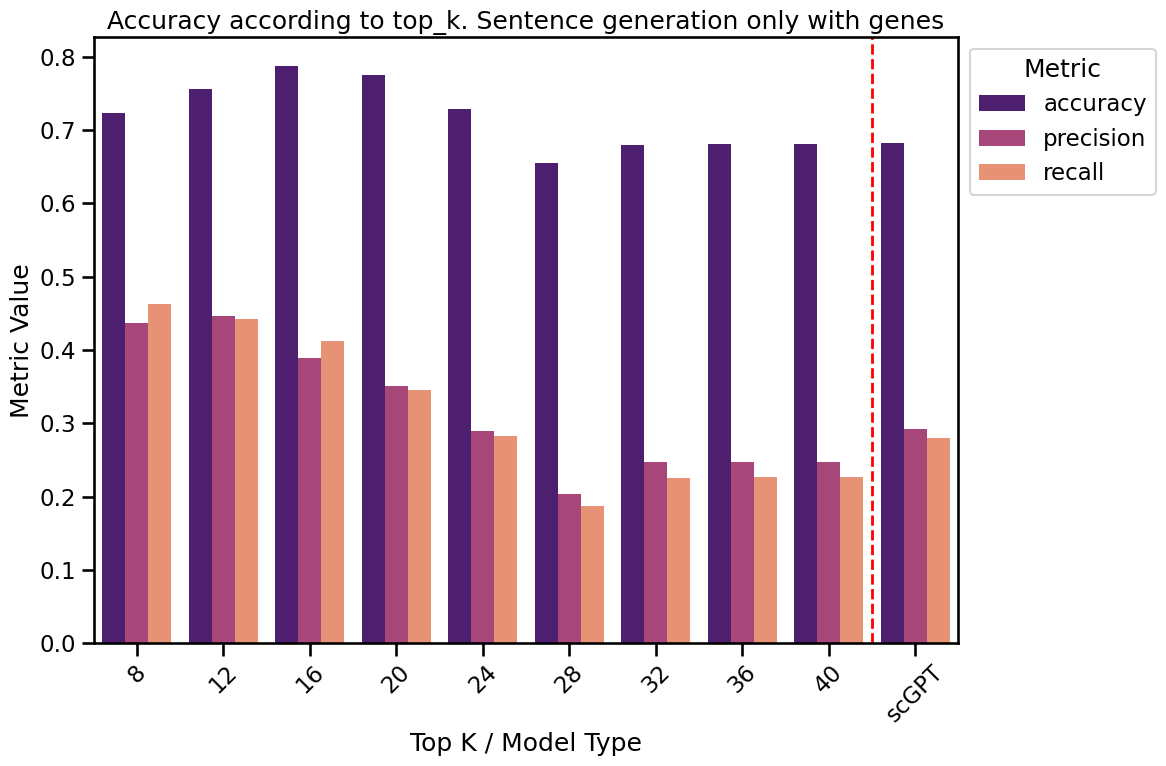

In [69]:
df_obs = df_results[df_results['obs_features'] == 'organ_tissue']
zeroshot_results = {
    "top_k": "scGPT",  # Unique identifier
    "model_name": "none",
    "obs_features": "None",
    'accuracy': 0.6829705505761844,
    'precision': 0.2924996107130576,
    'recall': 0.2803754444967942,
    'macro_f1': 0.253795206897759
}

# Convert the dictionary to a DataFrame
zeroshot_df = pd.DataFrame([zeroshot_results])

# Use concat to add the zeroshot results DataFrame to df_none
df_obs = pd.concat([df_obs, zeroshot_df], ignore_index=True)

# Melt the DataFrame to make it suitable for seaborn's barplot
df_melted = df_obs.melt(id_vars=['top_k'], value_vars=['accuracy', 'precision', 'recall'],
                         var_name='Metric', value_name='Value')

# Create a barplot
plt.figure(figsize=(12, 8))  # Adjust the figure size as needed
barplot = sns.barplot(x='top_k', y='Value', hue='Metric', data=df_melted, palette="magma")

# Highlight the scGPT zeroshot results
# Find the index for scGPT results to draw a vertical line
scgpt_index = df_melted.index[df_melted['top_k'] == 'scGPT'].tolist()[0]
plt.axvline(x=scgpt_index - 0.5, color='red', linestyle='--', linewidth=2)  # Adjusting x position for aesthetics

plt.title('Accuracy according to top_k. Sentence generation only with genes')
plt.xlabel('Top K / Model Type')
plt.ylabel('Metric Value')
plt.xticks(rotation=45)  # Rotate x-axis labels if necessary
plt.legend(title='Metric', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()  # Adjust layout to make room for legend and x-axis labels
plt.show()